In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy.optimize import curve_fit

In [2]:
df = pd.read_excel("Mexico_GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [3]:
cdf=df[['Periodo','GDP']]
cdf.head(9)

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10
5,1965,2.184000e+10
6,1966,2.432000e+10
7,1967,2.656000e+10
8,1968,2.936000e+10


array([[<Axes: title={'center': 'Periodo'}>,
        <Axes: title={'center': 'GDP'}>]], dtype=object)

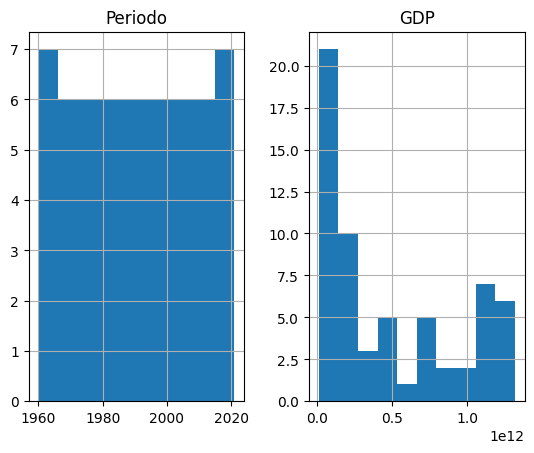

In [4]:
cdf.hist()

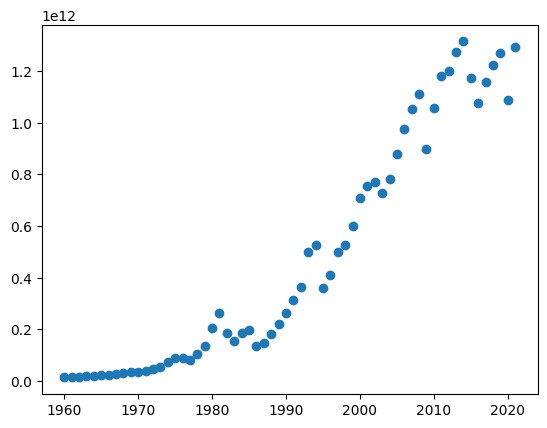

In [5]:
x=np.array([cdf['Periodo']])
y=np.array([cdf['GDP']])
plt.scatter(x,y)

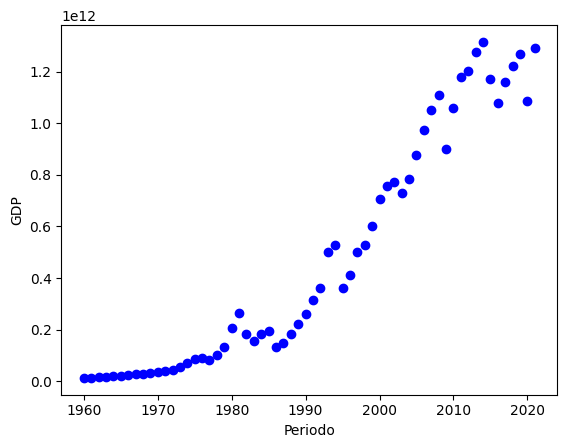

In [6]:
plt.scatter(cdf.Periodo, cdf.GDP,  color='blue')
plt.xlabel("Periodo")
plt.ylabel("GDP")
plt.show()

Funcion para realizar la Regresion Lineal metodo de minimos cuadrados

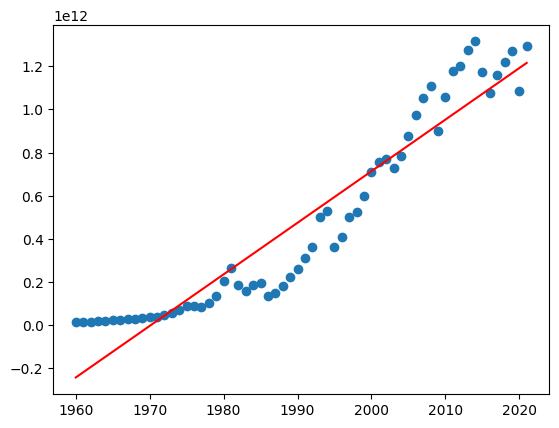

In [7]:
# Ajustar una línea recta a los datos
coeficientes = np.polyfit(x.flatten(), y.flatten(), 1)
linea = np.poly1d(coeficientes)

# Calcular los valores de y correspondientes a los valores de x
x_linea = np.linspace(x.min(), x.max(), 100)
y_linea = linea(x_linea)

# Dibujar el gráfico de dispersión
plt.scatter(x, y)
plt.plot(x_linea, y_linea, 'r-')  
plt.show()

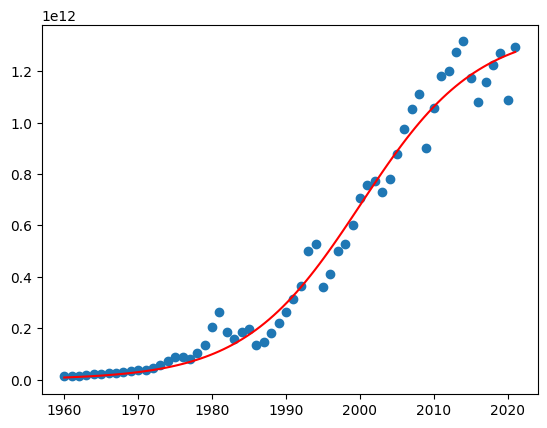

In [8]:
# Definir la función logística
def funcion_logistica(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

x = cdf['Periodo'].values
y = cdf['GDP'].values

# Ajustar la curva logística a los datos
parametros_optimos, _ = curve_fit(funcion_logistica, x, y, p0=[max(y), 1, np.median(x)])
x_curva = np.linspace(x.min(), x.max(), 100) # Valores de X para los que se calculará Y
y_curva = funcion_logistica(x_curva, *parametros_optimos) # Valores de Y calculados

# Dibujar el gráfico de dispersión
plt.scatter(x, y)
plt.plot(x_curva, y_curva, 'r-')
plt.show()

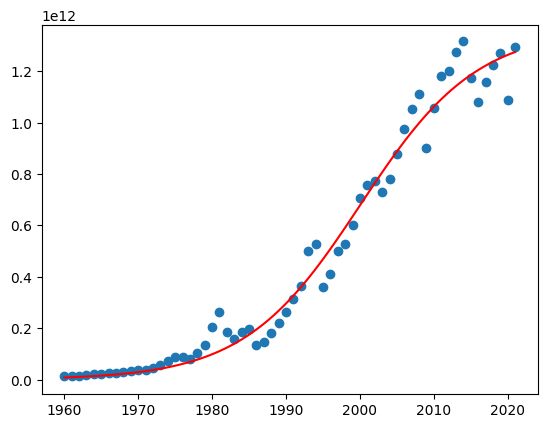

In [10]:
# Mejora de la estimación inicial y limitación del rango de los parámetros
L_estimado = max(y)
k_estimado = 1
x0_estimado = np.median(x)

parametros_optimos, _ = curve_fit(funcion_logistica, x, y, p0=[L_estimado, k_estimado, x0_estimado], bounds=(0, [L_estimado*10, 10, x.max()]))

x_curva = np.linspace(x.min(), x.max(), 100)
y_curva = funcion_logistica(x_curva, *parametros_optimos)

plt.scatter(x, y)
plt.plot(x_curva, y_curva, 'r-')
plt.show()

In [9]:
next_year = 2022
coef = np.polyfit(cdf.Periodo, cdf.GDP, 1)
pred= np.polyval(coef, next_year)
print("El PIB de México en el año 2022 será de: ", pred)

El PIB de México en el año 2022 será de:  1239856322086.3281
